## Connect to Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Collect Google News RSS Feed

檔案包含了以下欄位：
*   YYYYMMDD：新聞發布的日期。
*   YYYY：年份。
*   MM：月份。
*   DD：日期。
*   query：用於搜索的關鍵詞。
*   entries_count：當天找到的新聞條目數量。
*   i_post：當天新聞條目的索引。
*   title：新聞標題。
*   link：新聞鏈接。
*   summary：新聞摘要。

### Period: 2019~2023

In [ ]:
# 3個關鍵詞: carbon market、carbon emission、carbon price
import feedparser
import datetime
import pandas as pd

# 設定日期範圍
d1 = datetime.date(2019, 1, 1)  # 起始日期
d2 = datetime.date(2023, 12, 31)  # 結束日期
delta = d2 - d1

# 定義關鍵詞列表
queries = ['carbon+market', 'carbon+emission', 'carbon+price']

all_posts = []

for query in queries:
    for i in range(delta.days + 1):
        datetimei = d1 + datetime.timedelta(i)

        sYYYYMMDD = datetimei.strftime('%Y-%m-%d')
        sYYYY = datetimei.strftime('%Y')
        sMM = datetimei.strftime('%m')
        sDD = datetimei.strftime('%d')

        datetimei_start = datetimei
        datetimei_end = datetimei + datetime.timedelta(1)

        sYYYYMMDD_start = datetimei_start.strftime('%Y-%m-%d')
        sYYYYMMDD_end = datetimei_end.strftime('%Y-%m-%d')

        str_after_before = 'after:' + sYYYYMMDD_start + '+before:' + sYYYYMMDD_end

        # 修改 URL 中的查詢部分
        url = 'https://news.google.com/rss/search?q=' + query + '+' + str_after_before + '&ceid=US:en&hl=en-US&gl=US'

        feeds = feedparser.parse(url)
        entries_count = len(feeds.entries)

        i_post = 0
        for post in feeds.entries:
            i_post += 1
            all_posts.append((sYYYYMMDD, sYYYY, sMM, sDD, query, entries_count, i_post, post.title, post.link, post.summary))

# 轉換為 DataFrame
df = pd.DataFrame(all_posts, columns=['YYYYMMDD', 'YYYY', 'MM', 'DD', 'query', 'entries_count', 'i_post', 'title', 'link', 'summary'])

# 移除重複的文章
df = df.drop_duplicates(subset=['title', 'link', 'summary'])

# 保存到 CSV 文件
df.to_csv('/content/drive/MyDrive/Thesis Dataset/google_news_rss_feeds_20190101-20231231.csv')

df

,YYYYMMDD,YYYY,MM,DD,query,entries_count,i_post,title,link,summary
0,2020-01-31,2020,01,31,carbon+market,10,1,As Canada Contemplates Biodiversity Offsetting...,https://news.google.com/rss/articles/CBMib2h0d...,"<a href=""https://news.google.com/rss/articles/..."
1,2020-01-31,2020,01,31,carbon+market,10,2,Why $25 million of carbon credits from the Gre...,https://news.google.com/rss/articles/CBMib2h0d...,"<a href=""https://news.google.com/rss/articles/..."
2,2020-01-31,2020,01,31,carbon+market,10,3,Friday letters: Crenshaw and climate change - ...,https://news.google.com/rss/articles/CBMicGh0d...,"<a href=""https://news.google.com/rss/articles/..."
3,2020-01-31,2020,01,31,carbon+market,10,4,Nike prototype Vaporfly shoe banned but curren...,https://news.google.com/rss/articles/CBMiLmh0d...,"<a href=""https://news.google.com/rss/articles/..."
4,2020-01-31,2020,01,31,carbon+market,10,5,Carbon Offsetting: Tree-Hugger Dream Or Greenw...,https://news.google.com/rss/articles/CBMiXWh0d...,"<a href=""https://news.google.com/rss/articles/..."
...,...,...,...,...,...,...,...,...,...,...
79046,2023-12-31,2023,12,31,carbon+price,11,7,Here's what will cost more or less in B.C. in ...,https://news.google.com/rss/articles/CBMiSWh0d...,"<a href=""https://news.google.com/rss/articles/..."
79047,2023-12-31,2023,12,31,carbon+price,11,8,Canada's Carbon Pricing: Poilievre vs Trudeau ...,https://news.google.com/rss/articles/CBMiWGh0d...,"<a href=""https://news.google.com/rss/articles/..."
79048,2023-12-31,2023,12,31,carbon+price,11,9,Saskatchewan stops collecting federal carbon l...,https://news.google.com/rss/articles/CBMidWh0d...,"<a href=""https://news.google.com/rss/articles/..."
79049,2023-12-31,2023,12,31,carbon+price,11,10,How much is gas tax in Canada? Changes in 2 pr...,https://news.google.com/rss/articles/CBMiZ2h0d...,"<a href=""https://news.google.com/rss/articles/..."


## Analysis News Platforms

In [ ]:
import pandas as pd

# 假設 df 是您已經從 CSV 文件加載的 pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/news platforms_2006-2023.csv')

# 計算每個 'news_platform' 出現的次數並取前10名
top_news_platforms = df['news_platform'].value_counts()

# 將結果轉換為 DataFrame
top_news_platforms_df = top_news_platforms.reset_index()
top_news_platforms_df.columns = ['news_platform', 'count']

# 將前10個 news_platforms 保存到 CSV 文件
top_news_platforms_csv_path = '/content/drive/MyDrive/Thesis Dataset/allnews counts_2006-2023.csv'
top_news_platforms_df.to_csv(top_news_platforms_csv_path, index=False)

<ipython-input-6-810fb9ab7d23>:4: DtypeWarning: Columns (14,16,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/news platforms_2006-2023.csv')


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/allnews counts_2006-2023.csv')
df

,news_platform,count
0,www.sciencedirect.com,1766
1,www.theguardian.com,1642
2,www.bikeradar.com,1047
3,www.cbc.ca,979
4,www.nature.com,838
...,...,...
9213,siouxcityjournal.com,1
9214,www.johnogroat-journal.co.uk,1
9215,wraltechwire.com,1
9216,thinklandscape.globallandscapesforum.org,1


## Create Visualization

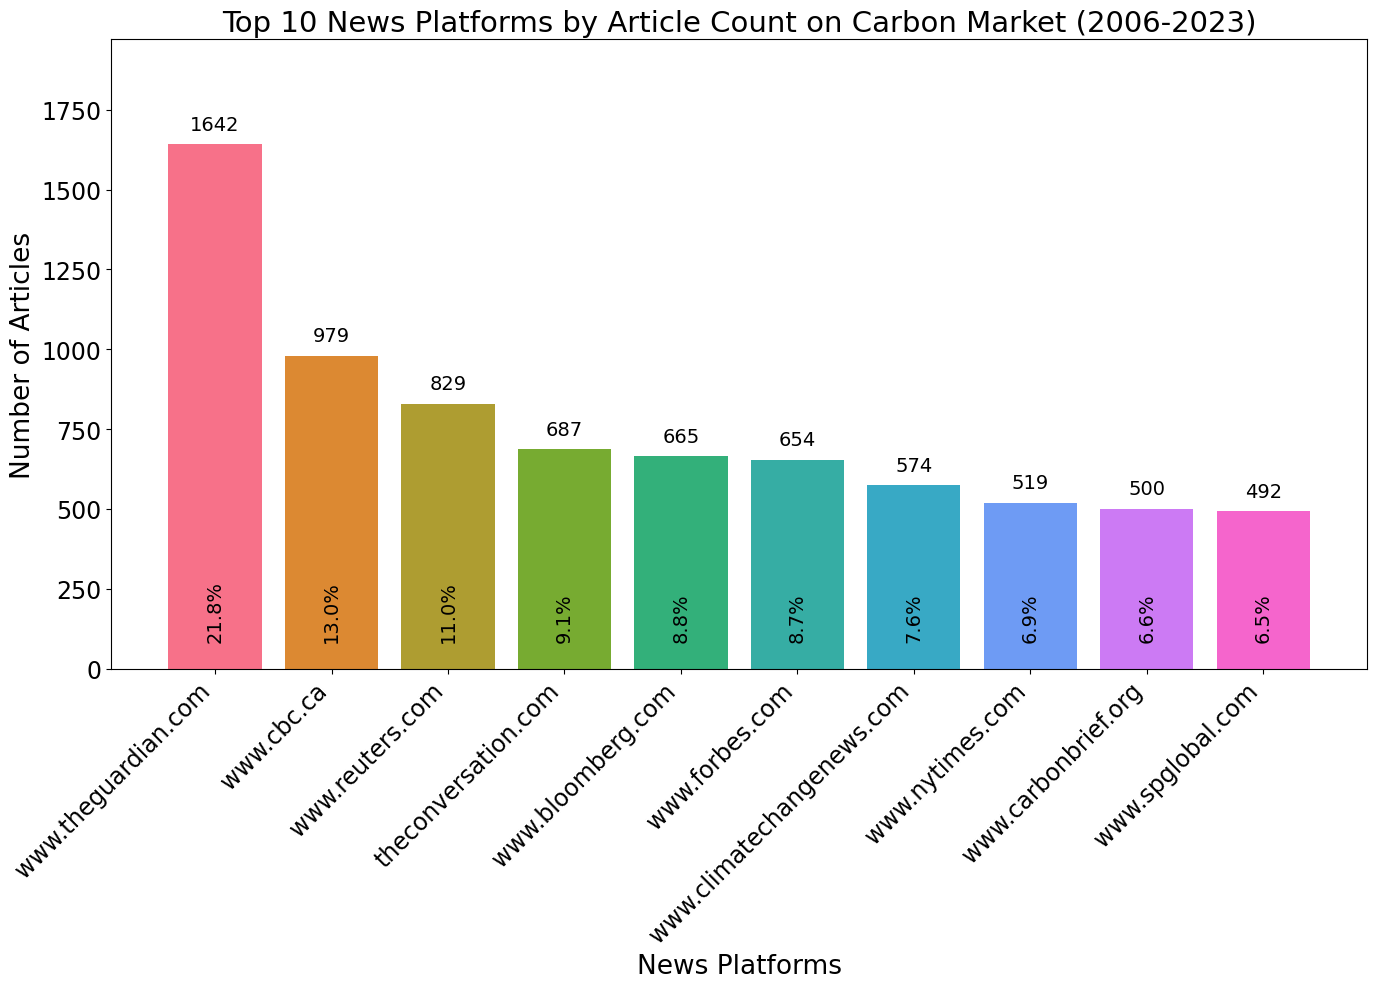

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns  # 引入 seaborn 庫來使用更豐富的色彩選擇

# 讀取 csv 文件
df_top10 = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/top10 platforms_2006-2023.csv')

# 確保 'count' 列沒有缺失值或非數字值
df_top10['count'] = pd.to_numeric(df_top10['count'], errors='coerce').fillna(0)

# 為 df_top10 添加百分比欄位
df_top10['percentage'] = (df_top10['count'] / df_top10['count'].sum()) * 100

plt.figure(figsize=(14, 10))  # 設定圖表大小

# 使用 Seaborn 的 'husl' 色彩調色板，適合保持色彩在色盲視覺下的清晰度
colors = sns.color_palette("husl", len(df_top10))

# 繪製柱狀圖
bars = plt.bar(df_top10['news_platform'], df_top10['count'], color=colors)

plt.title('Top 10 News Platforms by Article Count on Carbon Market (2006-2023)', fontsize=21)  # 設定標題及其字體大小
plt.xlabel('News Platforms', fontsize=19)  # 設定 x 軸標籤及其字體大小
plt.ylabel('Number of Articles', fontsize=19)  # 設定 y 軸標籤及其字體大小
plt.xticks(rotation=45, ha='right', fontsize=17)  # 設定 x 軸刻度旋轉及其字體大小
plt.yticks(fontsize=17)  # 設定 y 軸刻度字體大小

# 在每個柱形上方添加數據標籤
for index, bar in enumerate(bars):
    yval = bar.get_height()
    percent = df_top10.iloc[index]['percentage']  # 獲取百分比
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02 * max(df_top10['count']), f"{int(yval)}", ha='center', va='bottom', fontsize=14, color='black')
    if percent > 5:  # 只有在百分比大於5%時才顯示在條形底部
        plt.text(bar.get_x() + bar.get_width()/2, 0.05 * max(df_top10['count']), f"{percent:.1f}%", ha='center', va='bottom', fontsize=14, color='black', rotation=90)

plt.ylim(0, max(df_top10['count']) * 1.2)  # 調整 y 軸上限以確保空間足夠顯示數據標籤
plt.tight_layout()  # 確保內容顯示完整
plt.show()  # 顯示圖表

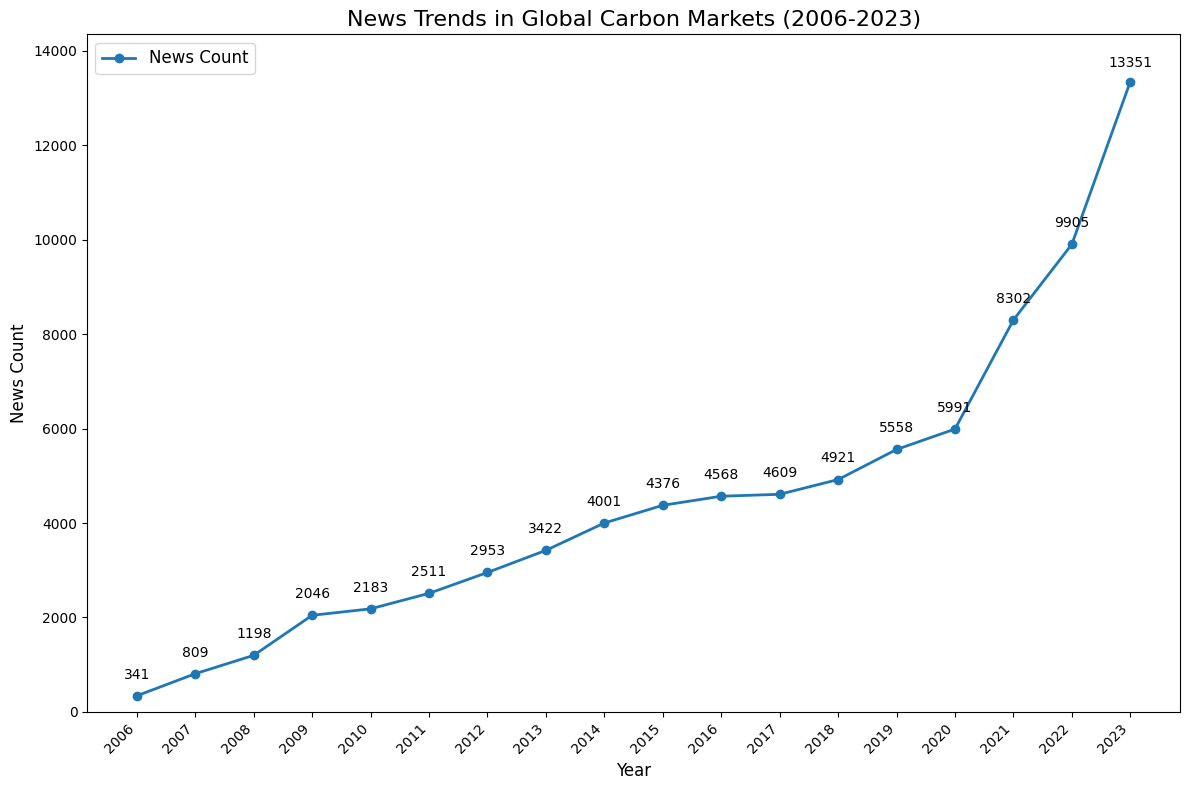

In [ ]:
import matplotlib.pyplot as plt

# 定義年份和對應的新聞數量
years = [2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
news_counts = [341, 809, 1198, 2046, 2183, 2511, 2953, 3422, 4001, 4376, 4568, 4609, 4921, 5558, 5991, 8302, 9905, 13351]

# 創建一個新的圖形,並設置圖表大小
plt.figure(figsize=(12, 8), facecolor='white')  # Adjusted figure size

# 繪製折線圖
plt.plot(years, news_counts, marker='o', linewidth=2, markersize=6, color='#1f77b4', label='News Count')

# 設置圖表標題和軸標籤
plt.title('News Trends in Global Carbon Markets (2006-2023)', fontsize=16, fontweight='normal')
plt.xlabel('Year', fontsize=12)
plt.ylabel('News Count', fontsize=12)

# 設置x軸刻度
plt.xticks(years, rotation=45, ha='right')

# 在每個數據點添加數值標籤,並調整標籤位置
offset = 300  # Consistent offset
for x, y in zip(years, news_counts):
    if y == max(news_counts):  # Additional offset for the last value
        offset = 250  # Increased offset for the last value
    plt.text(x, y + offset, str(y), ha='center', va='bottom', fontsize=10)

# 設置y軸的範圍，以避免數字被切割
plt.ylim(0, max(news_counts) + 1000)  # Adjusted y-axis to fit labels

# 添加圖例
plt.legend(loc='upper left', fontsize=12)

# 調整圖表佈局
plt.tight_layout()

# 顯示圖表
plt.show()

## Extract News Content

In [ ]:
import time
from google.colab import files

import requests
import pandas as pd
from bs4 import BeautifulSoup

import codecs
def write_file_utf8(filename, text):
    with codecs.open(filename, 'w', encoding='utf-8') as f:
        f.write(text)
        f.close()

def html2text(html):
    soup = BeautifulSoup(html, "html.parser")
    for script in soup(["script", "style"]):
        script.extract()

    text = soup.get_text()

    lines = (line.strip() for line in text.splitlines())

    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))

    text = '\n'.join(chunk for chunk in chunks if chunk)
    return text

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'}
url = 'https://www.nytimes.com/2023/12/02/climate/biden-social-cost-carbon-climate-change.html'
response = requests.get(url, headers = headers, timeout=2)

html = response.text

text = html2text(html)
print('len(html)', len(html))
print('text(text)', len(text))
print(text)

write_file_utf8('outputfilehtml.html', html)
write_file_utf8('outputfiletext.txt', text)
time.sleep(1)  # time sleep 1 second

files.download('outputfilehtml.html')
files.download('outputfiletext.txt')
print('OK')

len(html) 239004
text(text) 8718
Biden Administration Unleashes Powerful Regulatory Tool Aimed at Climate - The New York Times
Skip to contentSkip to site indexClimate Today’s PaperClimate|Biden Administration Unleashes Powerful Regulatory Tool Aimed at Climatehttps://www.nytimes.com/2023/12/02/climate/biden-social-cost-carbon-climate-change.htmlShare full articleAdvertisementSKIP ADVERTISEMENTSupported bySKIP ADVERTISEMENTBiden Administration Unleashes Powerful Regulatory Tool Aimed at ClimateIts new estimate of the economic impact of climate change could create the legal justification for aggressive new regulations.Share full articleTucked in its new rules to curb methane emissions, the E.P.A. set a new social cost for carbon, a number almost four times its previous amount: $190 a ton.Credit...Matthew Brown/Associated PressBy Coral DavenportCoral Davenport has covered climate policy and politics for 17 years.Dec. 2, 2023The Biden administration’s crackdown on methane leaks from oil w

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

OK


In [ ]:
import requests
from bs4 import BeautifulSoup
import codecs
import time
from google.colab import files

def write_file_utf8(filename, text):
    with codecs.open(filename, 'w', encoding='utf-8') as f:
        f.write(text)
        f.close()

def html2text(html):
    soup = BeautifulSoup(html, "html.parser")
    for script in soup(["script", "style"]):
        script.extract()

    # 假设文章内容在一个特定的 div 或 article 标签中
    # 需要根据实际网页结构进行调整
    article = soup.find('div', class_='article-container')  # 示例：查找类名为 'article-container' 的 div
    if not article:
        article = soup  # 如果找不到对应元素，则默认提取整个页面

    text = article.get_text()
    lines = (line.strip() for line in text.splitlines())
    text = '\n'.join(line for line in lines if line)
    return text

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.146 Safari/537.36'}
url = 'https://www.forbes.com/forbes/2008/0421/080.html'
response = requests.get(url, headers=headers, timeout=5)

html = response.text
text = html2text(html)

print('len(html)', len(html))
print('len(text)', len(text))
print(text[:1000])  # 打印前1000个字符作为预览

write_file_utf8('outputfilehtml.html', html)
write_file_utf8('outputfiletext.txt', text)

time.sleep(1)  # 等待1秒

# Google Colab 环境中的文件下载
files.download('outputfilehtml.html')
files.download('outputfiletext.txt')
print('Files downloaded successfully.')

len(html) 527325
len(text) 5359
Turning Gold Dust Into Clean AirSubscribe to newslettersSubscribeSign InBETAThis is a BETA experience. You may opt-out by clicking hereMore From ForbesJan 23, 2024,01:54pm ESTBorrowing a Page From the Military For Physician Leadership TrainingJan 23, 2024,01:38pm ESTThe Best Travel System Strollers Offer Convenience To Busy FamiliesJan 23, 2024,01:34pm ESTThe Challenge Facing Samsung’s Galaxy S24 UltraJan 23, 2024,01:33pm ESTOscar Nominations 2024: Studio Marketers Steal The SpotlightJan 23, 2024,01:30pm ESTHow To Author A Book: 17 Tips For Busy Executive Thought LeadersJan 23, 2024,01:28pm ESTHow To Prevent A Retirement BummerJan 23, 2024,01:26pm ESTThese Best Picture Nominees—Including ‘The Zone Of Interest’ And ‘American Fiction’—Are Hoping An Oscar Bump Can Help Their Box Office NumbersJan 23, 2024,01:24pm ESTThe Best Webcams That’ll Keep You Looking Sharp During Your MeetingsEdit StoryTurning Gold Dust Into Clean AirApr 3, 2008,07:20pm EDTThis artic

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Files downloaded successfully.


In [ ]:
# 沒有標題，且符號不對
import pandas as pd
from bs4 import BeautifulSoup
from google.colab import files
import io

def load_and_parse_html(file_content):
    return BeautifulSoup(file_content, 'html.parser')

def find_news_title(soup):
    if soup.h1:
        return soup.h1.get_text().strip()
    elif soup.h2:
        return soup.h2.get_text().strip()
    else:
        return "Title not found"

def find_news_content(soup):
    article_body = soup.find('article')
    if not article_body:
        article_body = soup.find(class_=['post', 'content', 'body', 'entry-content'])
    if article_body:
        paragraphs = article_body.find_all('p')
        return "\n".join(paragraph.get_text().strip() for paragraph in paragraphs)
    else:
        return "Content not found"

def extract_news_data(file_contents):
    data = []
    for content in file_contents:
        soup = load_and_parse_html(content)
        title = find_news_title(soup)
        content = find_news_content(soup)
        data.append({'title': title, 'content': content})
    return pd.DataFrame(data)

def main():
    uploaded = files.upload()
    file_contents = [io.StringIO(content.decode("utf-8")).read() for content in uploaded.values()]
    news_data = extract_news_data(file_contents)
    news_data.to_csv('extracted_news_data.csv', index=False)
    print("News data extracted and saved to 'extracted_news_data.csv'.")
    files.download('extracted_news_data.csv')

if __name__ == "__main__":
    main()

Saving reuters_ex1.html to reuters_ex1.html
Saving reuters_ex2.html to reuters_ex2.html
Saving reuters_ex3.html to reuters_ex3.html
News data extracted and saved to 'extracted_news_data.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# carboncredits
import pandas as pd
from bs4 import BeautifulSoup
from google.colab import files
import io

def load_and_parse_html(file_content):
    return BeautifulSoup(file_content, 'html.parser', from_encoding='utf-8')

def find_news_title(soup):
    meta_title = soup.find('meta', property='og:title') or soup.find('meta', attrs={'name': 'twitter:title'})
    if meta_title:
        return meta_title['content']
    elif soup.title:
        return soup.title.string.strip()
    else:
        return "Title not found"

def find_news_content(soup):
    article_body = soup.find('article') or soup.find(class_=['post', 'content', 'body', 'entry-content'])
    if article_body:
        paragraphs = article_body.find_all('p')
        return "\n".join(paragraph.get_text(strip=True) for paragraph in paragraphs)
    else:
        return "Content not found"

def extract_news_data(file_contents, file_names):
    data = []
    for content, filename in zip(file_contents, file_names):
        soup = load_and_parse_html(content)
        title = find_news_title(soup)
        content = find_news_content(soup)
        # 从文件名中提取sid
        sid = filename.split('.')[0]
        data.append({'sid': sid, 'title': title, 'content': content})
    return pd.DataFrame(data)

def main():
    print("Please upload your HTML files.")
    uploaded = files.upload()
    file_contents = [content.decode("utf-8") for content in uploaded.values()]
    file_names = list(uploaded.keys())  # 获取文件名作为sid来源
    news_data = extract_news_data(file_contents, file_names)
    output_filename = 'Title_Content_carboncredits.csv'
    news_data.to_csv(output_filename, index=False, encoding='utf-8-sig')
    print(f"News data extracted and saved to '{output_filename}'.")
    files.download(output_filename)

if __name__ == "__main__":
    main()

Please upload your HTML files.


Saving 62.html to 62.html
Saving 79.html to 79.html
Saving 188.html to 188.html
Saving 198.html to 198.html
Saving 258.html to 258.html
Saving 264.html to 264.html
Saving 387.html to 387.html
Saving 399.html to 399.html
Saving 447.html to 447.html
Saving 560.html to 560.html
Saving 573.html to 573.html
Saving 618.html to 618.html
Saving 632.html to 632.html
Saving 637.html to 637.html
Saving 641.html to 641.html
Saving 672.html to 672.html
Saving 691.html to 691.html
Saving 705.html to 705.html
Saving 728.html to 728.html
Saving 793.html to 793.html
Saving 815.html to 815.html
Saving 826.html to 826.html
Saving 867.html to 867.html
Saving 900.html to 900.html
Saving 911.html to 911.html
Saving 979.html to 979.html
Saving 1042.html to 1042.html
Saving 1065.html to 1065.html
Saving 1077.html to 1077.html
Saving 1145.html to 1145.html
Saving 1158.html to 1158.html
Saving 1190.html to 1190.html
Saving 1204.html to 1204.html
Saving 1259.html to 1259.html
Saving 1286.html to 1286.html
Saving

/usr/local/lib/python3.10/dist-packages/bs4/__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


News data extracted and saved to 'Title_Content_carboncredits.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import re

def remove_illegal_chars(s):
    # 移除字符串中的非法字符
    return re.sub(r'[\x00-\x1F\x7F-\x9F]', '', s)

# 指定原始CSV文件路径
csv_file_path = '/content/drive/MyDrive/Thesis Dataset/filtered_news_data.csv'

# 读取CSV文件
df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

# 过滤出特定新闻平台的记录
filtered_df = df[df['news_platform'] == 'carboncredits.com']

# 清理DataFrame中所有字符串型列的非法字符
for col in filtered_df.select_dtypes(include=['object']).columns:
    filtered_df[col] = filtered_df[col].apply(remove_illegal_chars)

# 指定过滤后的数据要保存的新Excel文件路径
output_excel_path = '/content/drive/MyDrive/Thesis Dataset/News_Platforms_Top10_1,697/carboncredits/carboncredits_news_data.xlsx'

# 将过滤后的数据保存为Excel文件
filtered_df.to_excel(output_excel_path, index=False)

print(f"Filtered data saved to {output_excel_path}")

Filtered data saved to /content/drive/MyDrive/Thesis Dataset/News_Platforms_Top10_1,697/carboncredits/carboncredits_news_data.xlsx


<ipython-input-33-e969d6efadc8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] = filtered_df[col].apply(remove_illegal_chars)


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Thesis Dataset/News_Platforms_Top10_1,697/carboncredits/Title_Content_carboncredits.csv")
df

,sid,title,content
0,62,Abu Dhabi National Oil Invests $15B in Decarbo...,Abu Dhabi National Oil Company (ADNOC) committ...
1,79,Alberta Prepares For Surplus of Carbon Credits,The Canadian province of Alberta made major ch...
2,188,Is Offsetting Carbon Worth It?,Is offsetting carbon worth it? This question h...
3,198,Goldman Sachs & Others Close Over $6 Billion C...,Goldman Sachs Asset Management (GSAM) raised $...
4,258,IMPT to Buy $54M Carbon Credits From Polygon-P...,IMPT closed a deal to buy carbon credits worth...
...,...,...,...
251,26651,Carbon Offsets Ignite Dispute Over Xcel's Colo...,Natural gas becomes a kitchen-table issue in t...
252,27566,Canada Faces 2 Carbon Issues: Shaky Carbon Tax...,Canada’s NDP Leader Jagmeet Singh advanced a m...
253,27730,Carbon Credits: What Are They and Why Are They...,Carbon credits have been a hot topic in the ne...
254,28361,Uranium Prices Hit 15-Year High at $85 Per Pound,Uranium prices are a significant topic for inv...


## Calculate Similarity by using OpenAI Models

Similarity Threshold = 0.75

In [ ]:
import pandas as pd
import numpy as np
import openai

# 初始化OpenAI客戶端
openai.api_key = 'OPEN_API_KEY'

# 定義獲取嵌入向量的函數
def get_embedding(text, model="text-embedding-ada-002"):
    return openai.Embedding.create(input=[text], model=model)['data'][0]['embedding']

# 讀取新聞資料
news_df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/2007_HTML/filtered_embedding_2007.csv')

# 定義關鍵字和相似度閾值
keywords = [
    "carbon market", "carbon emission", "carbon price", "emissions trading system",
    "carbon emission allowance trading", "carbon allowance", "carbon trading",
    "carbon tax", "carbon credits", "carbon neutrality", "carbon pricing mechanism"
]
similarity_threshold = 0.75

# 計算關鍵字嵌入向量
keyword_embeddings = [get_embedding(keyword) for keyword in keywords]

# 計算餘弦相似度的函數
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# 計算輸入標題與內容與關鍵字的相似度
def calculate_similarity(title, content, keyword_embeddings, weight_title=0.3, weight_content=0.7):
    title_embedding = get_embedding(title)
    content_embedding = get_embedding(content)

    title_similarities = [cosine_similarity(title_embedding, ke) for ke in keyword_embeddings]
    content_similarities = [cosine_similarity(content_embedding, ke) for ke in keyword_embeddings]

    avg_title_similarity = np.mean(title_similarities)
    avg_content_similarity = np.mean(content_similarities)

    weighted_similarity = (weight_title * avg_title_similarity + weight_content * avg_content_similarity) / (weight_title + weight_content)

    return weighted_similarity

# 過濾新聞函數，並計算similarity
def filter_news(news_df, keyword_embeddings, similarity_threshold):
    news_df['similarity'] = news_df.apply(lambda row: calculate_similarity(row['title'], row['content'], keyword_embeddings), axis=1)
    filtered_news_df = news_df[news_df['similarity'] > similarity_threshold]
    return filtered_news_df.sort_values(by='similarity', ascending=False)

# 過濾新聞
filtered_news_df = filter_news(news_df, keyword_embeddings, similarity_threshold)

# 儲存過濾後的新聞
filtered_news_df.to_csv('/content/drive/MyDrive/Thesis Dataset/2007_HTML/Valuded_2007.csv', index=False)

# 顯示結果
filtered_news_df

,SID,YYYYMMDD,YYYY,MM,DD,query,entries_count,i_post,title,content,link,summary,ACTUAL_URL,source,news_platform,similarity
75,76,2007/12/17,2007,12,17,carbon+emission,1,1,Europe divided over targets for cutting car CO...,Emergency talks aimed at setting EU targets to...,https://news.google.com/rss/articles/CBMid2h0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.independent.co.uk/climate-change/n...,https://www.independent.co.uk,www.independent.co.uk,0.812027
2,3,2007/6/15,2007,6,15,carbon+market,1,1,The inconvenient truth about the carbon offset...,In the concluding part of a major investigatio...,https://news.google.com/rss/articles/CBMiT2h0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.theguardian.com/environment/2007/j...,https://www.theguardian.com,www.theguardian.com,0.811414
82,83,2007/8/21,2007,8,21,carbon+emission,2,1,Carbon Capture and Storage ??The Answer to the...,Paul French investigates whether or not carbon...,https://news.google.com/rss/articles/CBMiNmh0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.power-technology.com/features/feat...,https://www.power-technology.com,www.power-technology.com,0.809089
92,93,2007/4/1,2007,4,1,carbon+market,1,1,Broker opens door to carbon market - New Zeala...,Carbon broker NZ Carbon Exchange has teamed wi...,https://news.google.com/rss/articles/CBMiYmh0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.nzherald.co.nz/business/broker-ope...,https://www.nzherald.co.nz,www.nzherald.co.nz,0.809016
99,100,2007/12/6,2007,12,6,carbon+market,6,1,Brazil blocks support of carbon storage throug...,Efforts to stimulate the development of safe c...,https://news.google.com/rss/articles/CBMiaWh0d...,"<a href=""https://news.google.com/rss/articles/...",https://bellona.org/news/ccs/2007-12-brazil-bl...,https://bellona.org,bellona.org,0.808720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,91,2007/7/31,2007,7,31,carbon+emission,7,4,…patio heaters? - Spiked,The fuss over a few gas heaters for the garden...,https://news.google.com/rss/articles/CBMiN2h0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.spiked-online.com/2007/07/31/patio...,https://www.spiked-online.com,www.spiked-online.com,0.753527
17,18,2007/12/3,2007,12,3,carbon+emission,4,2,Tories rethink nuclear power 'last resort',"Nuclear power is no longer to be viewed as ""a ...",https://news.google.com/rss/articles/CBMiTGh0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.theguardian.com/politics/2007/dec/...,https://www.theguardian.com,www.theguardian.com,0.753348
43,44,2007/2/1,2007,2,1,carbon+emission,6,3,Research Boost - DW (English),The UN climate panel has issued its strongest ...,https://news.google.com/rss/articles/CBMiVGh0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.dw.com/en/germany-boosts-investmen...,https://www.dw.com,www.dw.com,0.753276
47,48,2007/7/22,2007,7,22,carbon+emission,4,3,Going Green - DW (English),Citing rising environmental concerns among car...,https://news.google.com/rss/articles/CBMiUWh0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.dw.com/en/german-carmaker-porsche-...,https://www.dw.com,www.dw.com,0.752875


Similarity Threshold > 0.75

In [ ]:
import pandas as pd
import numpy as np
import openai

# 初始化OpenAI API
openai.api_key = 'OPEN_API_KEY'

# 定義獲取嵌入向量的函數
def get_embedding(text, model="text-embedding-ada-002"):
    response = openai.Embedding.create(input=[text], model=model)
    return response['data'][0]['embedding']

# 加載新聞資料
file_path = '/content/drive/MyDrive/Thesis Dataset/Embedding_Input/news platforms_updated_2010.csv'
news_df = pd.read_csv(file_path)

# 定義關鍵字和相似度閾值
keywords = [
    "carbon market", "carbon emission", "carbon price", "emissions trading system",
    "carbon emission allowance trading", "carbon allowance", "carbon trading",
    "carbon tax", "carbon credits", "carbon neutrality", "carbon pricing mechanism"
]
similarity_threshold = 0.75

# 計算關鍵字嵌入向量
keyword_embeddings = [get_embedding(keyword) for keyword in keywords]

# 計算餘弦相似度的函數
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# 計算標題與關鍵字的相似度
def calculate_similarity(title, keyword_embeddings):
    title_embedding = get_embedding(title)
    title_similarities = [cosine_similarity(title_embedding, ke) for ke in keyword_embeddings]
    avg_title_similarity = np.mean(title_similarities)
    return avg_title_similarity

# 過濾新聞
def filter_news(news_df, keyword_embeddings, similarity_threshold):
    irrelevant_news = []
    for _, row in news_df.iterrows():
        title = row['title']
        # 檢查標題是否為亂碼
        if not isinstance(title, str) or len(title.strip()) == 0:
            continue
        similarity = calculate_similarity(title, keyword_embeddings)
        if similarity < similarity_threshold:
            row['similarity'] = similarity
            irrelevant_news.append(row)
    return pd.DataFrame(irrelevant_news)

# 過濾新聞
filtered_news_df = filter_news(news_df, keyword_embeddings, similarity_threshold)

# 儲存過濾後的新聞
filtered_news_file_path = '/content/drive/MyDrive/Thesis Dataset/2010_HTML/<0.75_2010.csv'
filtered_news_df.to_csv(filtered_news_file_path, index=False)

# 顯示結果
filtered_news_df

,SID,YYYYMMDD,YYYY,MM,DD,query,entries_count,i_post,title,link,summary,ACTUAL_URL,source,news_platform,similarity
1,2,2010/1/1,2010,1,1,carbon+market,5,3,Adding sustainability into the bottom line is ...,https://news.google.com/rss/articles/CBMibGh0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.bostonherald.com/2010/01/01/adding...,https://www.bostonherald.com,www.bostonherald.com,0.734427
2,3,2010/1/1,2010,1,1,carbon+market,5,4,A Sauce for All - Taiwan Today,https://news.google.com/rss/articles/CBMiOmh0d...,"<a href=""https://news.google.com/rss/articles/...",https://taiwantoday.tw/news.php?post=12966&uni...,https://taiwantoday.tw,taiwantoday.tw,0.704061
3,4,2010/1/1,2010,1,1,carbon+market,5,5,Why Capitalism Is Evil - Daily Kos,https://news.google.com/rss/articles/CBMiMmh0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.dailykos.com/stories/2010/1/2/8212...,https://www.dailykos.com,www.dailykos.com,0.725371
4,5,2010/1/4,2010,1,4,carbon+market,2,1,Falls Lake pollution could require new treatme...,https://news.google.com/rss/articles/CBMiI2h0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.wral.com/story/6746623/!https://w...,https://www.wral.com,www.wral.com,0.724484
6,7,2010/1/5,2010,1,5,carbon+market,3,3,Making science pay - New Scientist,https://news.google.com/rss/articles/CBMiR2h0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.newscientist.com/article/mg2052742...,https://www.newscientist.com,www.newscientist.com,0.744717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1637,1638,2010/12/20,2010,12,20,carbon+price,6,6,Dirt 100 2011: Fox RP23 - Dirt Mountainbike,https://news.google.com/rss/articles/CBMiQWh0d...,"<a href=""https://news.google.com/rss/articles/...",https://dirtmountainbike.com/dirt-100-2015/dir...,https://dirtmountainbike.com,dirtmountainbike.com,0.718536
1638,1639,2010/12/21,2010,12,21,carbon+price,8,6,Sheppard subway extension: A quarter the stops...,https://news.google.com/rss/articles/CBMiggFod...,"<a href=""https://news.google.com/rss/articles/...",https://www.theglobeandmail.com/news/toronto/s...,https://www.theglobeandmail.com,www.theglobeandmail.com,0.710510
1641,1642,2010/12/27,2010,12,27,carbon+price,3,3,"Lamborghini Sesto Elemento, Aventador already ...",https://news.google.com/rss/articles/CBMiY2h0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.torquenews.com/106/lamborghini-ses...,https://www.torquenews.com,www.torquenews.com,0.712777
1642,1643,2010/12/28,2010,12,28,carbon+price,7,5,2011 Aprilia RSV4 Factory APRC SE and RSV4 R U...,https://news.google.com/rss/articles/CBMiZWh0d...,"<a href=""https://news.google.com/rss/articles/...",https://www.autoevolution.com/news/2011-aprili...,https://www.autoevolution.com,www.autoevolution.com,0.707562


Calculate text similarity

In [ ]:
import pandas as pd
import numpy as np
import openai
import os

# 初始化OpenAI API
openai.api_key = 'OPEN_API_KEY'

# 定義獲取嵌入向量的函數
def get_embedding(text, model="text-embedding-ada-002"):
    response = openai.Embedding.create(input=[text], model=model)
    return response['data'][0]['embedding']

# 定義關鍵字和相似度閾值
keywords = [
    "carbon market", "carbon emission", "carbon price", "emissions trading system",
    "carbon emission allowance trading", "carbon allowance", "carbon trading",
    "carbon tax", "carbon credits", "carbon neutrality", "carbon pricing mechanism"
]
similarity_threshold = 0.75

# 計算關鍵字嵌入向量
keyword_embeddings = [get_embedding(keyword) for keyword in keywords]

# 計算餘弦相似度的函數
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# 計算標題與關鍵字的相似度
def calculate_similarity(title, keyword_embeddings):
    title_embedding = get_embedding(title)
    title_similarities = [cosine_similarity(title_embedding, ke) for ke in keyword_embeddings]
    avg_title_similarity = np.mean(title_similarities)
    return avg_title_similarity

# 過濾新聞
def filter_news(news_df, keyword_embeddings, similarity_threshold):
    relevant_news = []
    for _, row in news_df.iterrows():
        title = row['title']
        # 檢查標題是否為亂碼
        if not isinstance(title, str) or len(title.strip()) == 0:
            continue
        similarity = calculate_similarity(title, keyword_embeddings)
        if similarity > similarity_threshold:
            row['similarity'] = similarity
            relevant_news.append(row)
    return pd.DataFrame(relevant_news)

# 處理多年的資料
years = range(2009, 2023 + 1)
input_base_path = '/content/drive/MyDrive/Thesis Dataset/Embedding_Input'
output_base_path = '/content/drive/MyDrive/Thesis Dataset/Embedding_Results'

for year in years:
    print(f"處理 {year} 年的資料...")
    input_file_path = os.path.join(input_base_path, f'news platforms_updated_{year}.csv')
    output_file_path = os.path.join(output_base_path, f'filtered_embedding_{year}.csv')

    if not os.path.exists(input_file_path):
        print(f"{input_file_path} 不存在，跳過...")
        continue

    news_df = pd.read_csv(input_file_path).head(10)  # 只讀取前10筆資料
    filtered_news_df = filter_news(news_df, keyword_embeddings, similarity_threshold)

    # 重新編號SID欄位，從1開始
    filtered_news_df['SID'] = range(1, len(filtered_news_df) + 1)

    filtered_news_df.to_csv(output_file_path, index=False)
    print(f"{year} 年的過濾結果已儲存至 {output_file_path}")

print("所有年份的資料處理完成。")

處理 2015 年的資料...
2015 年的過濾結果已儲存至 /content/drive/MyDrive/Thesis Dataset/Embedding_Results/filtered_embedding_2015.csv
處理 2016 年的資料...
2016 年的過濾結果已儲存至 /content/drive/MyDrive/Thesis Dataset/Embedding_Results/filtered_embedding_2016.csv
處理 2017 年的資料...
2017 年的過濾結果已儲存至 /content/drive/MyDrive/Thesis Dataset/Embedding_Results/filtered_embedding_2017.csv
處理 2018 年的資料...
2018 年的過濾結果已儲存至 /content/drive/MyDrive/Thesis Dataset/Embedding_Results/filtered_embedding_2018.csv
處理 2019 年的資料...
2019 年的過濾結果已儲存至 /content/drive/MyDrive/Thesis Dataset/Embedding_Results/filtered_embedding_2019.csv
處理 2020 年的資料...
2020 年的過濾結果已儲存至 /content/drive/MyDrive/Thesis Dataset/Embedding_Results/filtered_embedding_2020.csv
處理 2021 年的資料...
2021 年的過濾結果已儲存至 /content/drive/MyDrive/Thesis Dataset/Embedding_Results/filtered_embedding_2021.csv
處理 2022 年的資料...
2022 年的過濾結果已儲存至 /content/drive/MyDrive/Thesis Dataset/Embedding_Results/filtered_embedding_2022.csv
處理 2023 年的資料...
2023 年的過濾結果已儲存至 /content/drive/MyDrive/Thesis Dataset/Em

## Filter News

In [ ]:
import pandas as pd
import os

# Keywords grouped by relevance
keywords_groups = [
    "BMW/TOYOTA/Audi/Ferrari/Mclaren/Mazda/Honda/Volvo",
    "NASA/ozone",
    "camel",
    "monoxide/methane/dioxide",
    "algae/nano/ethanol/fabrics/nuclear/solar",
    "building/architecture/ocean/plant",
    "electric car/motor/bicycle/bike/race car/ship/yacht",
    "fiber/label/footprint",
    "fuel/oil/coal/gas",
    "review/wheel/fertilizer/graphene"
]

# Split groups into individual keywords and flatten the list
keywords = [keyword for group in keywords_groups for keyword in group.split('/')]

# Function to find matching keywords in the title
def find_keywords(title):
    matched_keywords = [keyword for keyword in keywords if keyword in title]
    return ','.join(sorted(matched_keywords))

# Folder paths
input_base_path = '/content/drive/MyDrive/Thesis Dataset/Embedding_Results'
output_base_path = '/content/drive/MyDrive/Thesis Dataset/Embedding_Filter'

# Process each year from 2015 to 2023
for year in range(2015, 2023 + 1):
    print(f"Processing data for {year}...")
    input_file_path = os.path.join(input_base_path, f'filtered_embedding_{year}.csv')
    output_file_path = os.path.join(output_base_path, f'keywords_{year}.csv')
    remaining_file_path = os.path.join(output_base_path, f'remain_{year}.csv')

    if not os.path.exists(input_file_path):
        print(f"File does not exist: {input_file_path}, skipping...")
        continue

    data = pd.read_csv(input_file_path)
    data['keyword'] = data['title'].apply(find_keywords)
    filtered_data = data[data['keyword'] != '']
    remaining_data = data[data['keyword'] == '']

    # Add SID column starting from 1 for both filtered and remaining data
    filtered_data = filtered_data.reset_index(drop=True)
    filtered_data.index += 1
    filtered_data['SID'] = filtered_data.index

    remaining_data = remaining_data.reset_index(drop=True)
    remaining_data.index += 1
    remaining_data['SID'] = remaining_data.index

    # Save the data
    filtered_data.to_csv(output_file_path, index=False)
    remaining_data.to_csv(remaining_file_path, index=False)
    print(f"Data for {year} saved. Filtered data entries: {len(filtered_data)}, Remaining data entries: {len(remaining_data)}")

print("Data processing for all specified years completed.")

Processing data for 2015...
Data for 2015 saved. Filtered data entries: 466, Remaining data entries: 1587
Processing data for 2016...
Data for 2016 saved. Filtered data entries: 481, Remaining data entries: 1638
Processing data for 2017...
Data for 2017 saved. Filtered data entries: 507, Remaining data entries: 1675
Processing data for 2018...
Data for 2018 saved. Filtered data entries: 537, Remaining data entries: 2006
Processing data for 2019...
Data for 2019 saved. Filtered data entries: 641, Remaining data entries: 2608
Processing data for 2020...
Data for 2020 saved. Filtered data entries: 717, Remaining data entries: 2899
Processing data for 2021...
Data for 2021 saved. Filtered data entries: 1107, Remaining data entries: 5087
Processing data for 2022...
Data for 2022 saved. Filtered data entries: 1246, Remaining data entries: 6452
Processing data for 2023...
Data for 2023 saved. Filtered data entries: 1741, Remaining data entries: 9068
Data processing for all specified years com

In [ ]:
import pandas as pd
import os

# 定義關鍵詞列表
keywords = [
    "carbon market", "carbon emission", "carbon price", "emissions trading system",
    "carbon emission allowance trading", "carbon allowance", "carbon trading",
    "carbon tax", "carbon credits", "carbon neutrality", "carbon pricing mechanism",
    "ETS"
]

# 檢查title欄位並將符合的關鍵詞添加到新欄位filter_word中
def find_keywords(title):
    matches = [keyword for keyword in keywords if keyword in title.lower()]
    return ', '.join(matches) if matches else None

# 計算每條記錄中關鍵詞的數量
def count_keywords(filter_word):
    return len(filter_word.split(', ')) if filter_word else 0

# 資料夾路徑
input_base_path = '/content/drive/MyDrive/Thesis Dataset/Filtered_Word'
output_base_path = '/content/drive/MyDrive/Thesis Dataset/Filtered_Word/Results'

# 處理每個年份從2015到2023
for year in range(2015, 2024):
    print(f"Processing data for {year}...")
    input_file_path = os.path.join(input_base_path, f'filtered_embedding_{year}.csv')
    output_file_path = os.path.join(output_base_path, f'Filtered_Words_{year}.csv')

    if not os.path.exists(input_file_path):
        print(f"File does not exist: {input_file_path}, skipping...")
        continue

    # 讀取CSV檔案
    data = pd.read_csv(input_file_path)
    data['filter_word'] = data['title'].apply(find_keywords)
    data['keyword_count'] = data['filter_word'].apply(count_keywords)

    # 依據關鍵詞數量進行排序
    sorted_data = data.sort_values(by='keyword_count', ascending=False)

    # 保存數據
    sorted_data.to_csv(output_file_path, index=False)
    print(f"Data for {year} saved. Total entries with keywords: {sorted_data['keyword_count'].sum()}")

print("Data processing for all specified years completed.")

Processing data for 2015...
Data for 2015 saved. Total entries with keywords: 132
Processing data for 2016...
Data for 2016 saved. Total entries with keywords: 238
Processing data for 2017...
Data for 2017 saved. Total entries with keywords: 214
Processing data for 2018...
Data for 2018 saved. Total entries with keywords: 328
Processing data for 2019...
Data for 2019 saved. Total entries with keywords: 517
Processing data for 2020...
Data for 2020 saved. Total entries with keywords: 568
Processing data for 2021...
Data for 2021 saved. Total entries with keywords: 1255
Processing data for 2022...
Data for 2022 saved. Total entries with keywords: 1882
Processing data for 2023...
Data for 2023 saved. Total entries with keywords: 3062
Data processing for all specified years completed.
